# <center> Analyzing Stanley Cup Champions 1927-2019 </center> 

#### This notebook takes Stanley Cup Finals data scraped from [Wikipedia](https://en.wikipedia.org/wiki/List_of_Stanley_Cup_champions#NHL_champions_(since_1927)) using [VBA](https://github.com/cwils021/Stanley-Cup-Champs-1927-2019/blob/master/StanleyCupChamp1927_2019_VBAScript.md) and cleans it to an acceptable format for basic exploratory analysis

## Step 1: Download the Data

To begin, users can download the original data from this [Repo](https://github.com/cwils021/Stanley-Cup-Champs-1927-2019/blob/master/_data/SCC1927-2019.csv), or can try scraping the data themselves from Wikipedia using the above VBA script

## Step 2: Import Data and Packages

In [1]:
%matplotlib inline
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/chris/Documents/GitHub Repos/Stanley-Cup-Champs-1927-2019/_data/SCC1927-2019.csv",
                   header=0)
data = data.set_index('Year')
data.head()

,Winning team,Coach,Games,Losing team,Coach.1,Winning goal
Year,,,,,,
1927,"Ottawa Senators (C) (5, 4–1)",Dave Gill,2–0–2,"Boston Bruins (A) (1, 0–1)",Art Ross,"Cy Denneny (7:30, second)\n"
1928,"New York Rangers (A) (1, 1–0)",Lester Patrick-playing,3–2,"Montreal Maroons (C) (2, 1–1)",Eddie Gerard,"Frank Boucher (3:35, third)\n"
1929,"Boston Bruins (A) (2, 1–1)",Cy Denneny-playing,2–0,"New York Rangers (A) (2, 1–1)",Lester Patrick,"Bill Carson (18:02, third)\n"
1930,"Montreal Canadiens (C) (6, 3–2)",Cecil Hart,2–0,"Boston Bruins (A) (3, 1–2)",Art Ross,"Howie Morenz (1:00, second)\n"
1931,"Montreal Canadiens (C) (7, 4–2)",Cecil Hart,3–2,"Chicago Black Hawks (A) (1, 0–1)",Dick Irvin,"Johnny Gagnon (9:59, second)\n"


Now that the data has successfully been loaded, we set the index to year. From printing the data it can also be seen that there is quite a bit of cleaning to do before we can properly analyze it. This includes:
* The year 2005 needs to be dropped due to the 04/05 NHL Season Lockout where no playoffs occurred
* column names - they contain spaces and are not all unique (coach, coach.1)
* winning and losing team columns actually contain the team name, conference, total apperances to the finals to date, and record to date
* the winning goal column similar to the teams columns contains multiple pieces of information (goal scorer, time of game winning goal, period of game winning goal)

## Step 3: Drop 2005 and Clean Column Names

In [2]:
data = data.drop(2005,axis=0)
data = data.rename(columns={"Winning team": "team_win",
                            "Coach": "coach_win",
                            "Losing team": "team_lose",
                            "Coach.1": "coach_lose",
                            "Winning goal\n": "win_gs"
                            })
data.head()

,team_win,coach_win,Games,team_lose,coach_lose,win_gs
Year,,,,,,
1927,"Ottawa Senators (C) (5, 4–1)",Dave Gill,2–0–2,"Boston Bruins (A) (1, 0–1)",Art Ross,"Cy Denneny (7:30, second)\n"
1928,"New York Rangers (A) (1, 1–0)",Lester Patrick-playing,3–2,"Montreal Maroons (C) (2, 1–1)",Eddie Gerard,"Frank Boucher (3:35, third)\n"
1929,"Boston Bruins (A) (2, 1–1)",Cy Denneny-playing,2–0,"New York Rangers (A) (2, 1–1)",Lester Patrick,"Bill Carson (18:02, third)\n"
1930,"Montreal Canadiens (C) (6, 3–2)",Cecil Hart,2–0,"Boston Bruins (A) (3, 1–2)",Art Ross,"Howie Morenz (1:00, second)\n"
1931,"Montreal Canadiens (C) (7, 4–2)",Cecil Hart,3–2,"Chicago Black Hawks (A) (1, 0–1)",Dick Irvin,"Johnny Gagnon (9:59, second)\n"


## Step 4: Clean team_win Column

In [3]:
#split record and appearances from win_team
data[['team_win','DROP','WREC']] = data.team_win.str.rpartition('(')
data = data.drop('DROP', axis=1)
data['team_win'] = data.team_win.str.rstrip()
#data.head() #uncomment this line to view how data changes

In [4]:
#create temp df to split conf from win_team
temp = data.team_win.str.rsplit("(",1).to_frame()
temp[['win_team','wcon']] = pd.DataFrame(temp.team_win.values.tolist(),index=temp.index)
temp = temp.drop('team_win',axis=1)
#temp.head() #uncomment this line to view how data changes

In [5]:
#add team_Win and wcon to df
data[['team_win','wcon']] = temp[['win_team','wcon']]
data['wcon'] = data.wcon.str.rstrip(')')
data['wcon'] = data.wcon.str.lstrip()
#data.head() #uncomment this line to view how data changes

In [6]:
#clean WREC col by splitting apperances to date and record to date
data[['wt_app2d','DROP','wt_rec2d']] = data.WREC.str.partition(',')
data = data.drop(['WREC','DROP'],axis=1)
data['wt_rec2d'] = data.wt_rec2d.str.rstrip(')')
data.head()

,team_win,coach_win,Games,team_lose,coach_lose,win_gs,wcon,wt_app2d,wt_rec2d
Year,,,,,,,,,
1927,Ottawa Senators,Dave Gill,2–0–2,"Boston Bruins (A) (1, 0–1)",Art Ross,"Cy Denneny (7:30, second)\n",C,5,4–1
1928,New York Rangers,Lester Patrick-playing,3–2,"Montreal Maroons (C) (2, 1–1)",Eddie Gerard,"Frank Boucher (3:35, third)\n",A,1,1–0
1929,Boston Bruins,Cy Denneny-playing,2–0,"New York Rangers (A) (2, 1–1)",Lester Patrick,"Bill Carson (18:02, third)\n",A,2,1–1
1930,Montreal Canadiens,Cecil Hart,2–0,"Boston Bruins (A) (3, 1–2)",Art Ross,"Howie Morenz (1:00, second)\n",C,6,3–2
1931,Montreal Canadiens,Cecil Hart,3–2,"Chicago Black Hawks (A) (1, 0–1)",Dick Irvin,"Johnny Gagnon (9:59, second)\n",C,7,4–2


From the above we can see that the team_win column now only contains the winning team name, and we have created 3 new columns:
* wcon - Conference of winning team
* wt_app2d - Stanley Cup Finals appearances to date of winning team
* wt_rec2d - Stanley Cup Finals record to date of winning team

We can now repeat these steps for the team_lose column.

## Step 5: Clean team_lose Column

In [7]:
#split record and appearances from lose_team
data[['team_lose','DROP','LREC']] = data.team_lose.str.rpartition('(')
data = data.drop('DROP', axis=1)
data['team_lose'] = data.team_lose.str.rstrip()
#data.head() #uncomment this line to view how data changes

In [8]:
#create temp df to split conf from lose_team
temp = data.team_lose.str.rsplit("(",1).to_frame()
temp[['lose_team','lcon']] = pd.DataFrame(temp.team_lose.values.tolist(),index=temp.index)
temp = temp.drop('team_lose',axis=1)
#temp.head() #uncomment this line to view how data changes

In [9]:
#add team_lose and lcon to df
data[['team_lose','lcon']] = temp[['lose_team','lcon']]
data['lcon'] = data.lcon.str.rstrip(')')
data['lcon'] = data.lcon.str.lstrip()
#data.head() #uncomment this line to view how data changes

In [10]:
#clean LREC col by splitting apperances to date and record to date
data[['lt_app2d','DROP','lt_rec2d']] = data.LREC.str.partition(',')
data = data.drop(['LREC','DROP'],axis=1)
data['lt_rec2d'] = data.lt_rec2d.str.rstrip(')')
data.head()

,team_win,coach_win,Games,team_lose,coach_lose,win_gs,wcon,wt_app2d,wt_rec2d,lcon,lt_app2d,lt_rec2d
Year,,,,,,,,,,,,
1927,Ottawa Senators,Dave Gill,2–0–2,Boston Bruins,Art Ross,"Cy Denneny (7:30, second)\n",C,5,4–1,A,1,0–1
1928,New York Rangers,Lester Patrick-playing,3–2,Montreal Maroons,Eddie Gerard,"Frank Boucher (3:35, third)\n",A,1,1–0,C,2,1–1
1929,Boston Bruins,Cy Denneny-playing,2–0,New York Rangers,Lester Patrick,"Bill Carson (18:02, third)\n",A,2,1–1,A,2,1–1
1930,Montreal Canadiens,Cecil Hart,2–0,Boston Bruins,Art Ross,"Howie Morenz (1:00, second)\n",C,6,3–2,A,3,1–2
1931,Montreal Canadiens,Cecil Hart,3–2,Chicago Black Hawks,Dick Irvin,"Johnny Gagnon (9:59, second)\n",C,7,4–2,A,1,0–1


Now that both the team columns are cleaned we can move on to cleaning the win_gs column using similar steps as above.

## Step 6: Clean win_gs Column

In [11]:
#clean winning goal scorer col
data['win_gs'] = data.win_gs.str.rstrip()
data[['win_gs','DROP','goal_time']] = data.win_gs.str.partition('(')
data = data.drop('DROP',axis=1)
data[['goal_time','DROP','period']] = data.goal_time.str.partition(', ')
data = data.drop('DROP',axis=1)
data['period'] = data.period.str.rstrip(')')
data['win_gs'] = data.win_gs.str.strip()
data.head()

,team_win,coach_win,Games,team_lose,coach_lose,win_gs,wcon,wt_app2d,wt_rec2d,lcon,lt_app2d,lt_rec2d,goal_time,period
Year,,,,,,,,,,,,,,
1927,Ottawa Senators,Dave Gill,2–0–2,Boston Bruins,Art Ross,Cy Denneny,C,5,4–1,A,1,0–1,7:30,second
1928,New York Rangers,Lester Patrick-playing,3–2,Montreal Maroons,Eddie Gerard,Frank Boucher,A,1,1–0,C,2,1–1,3:35,third
1929,Boston Bruins,Cy Denneny-playing,2–0,New York Rangers,Lester Patrick,Bill Carson,A,2,1–1,A,2,1–1,18:02,third
1930,Montreal Canadiens,Cecil Hart,2–0,Boston Bruins,Art Ross,Howie Morenz,C,6,3–2,A,3,1–2,1:00,second
1931,Montreal Canadiens,Cecil Hart,3–2,Chicago Black Hawks,Dick Irvin,Johnny Gagnon,C,7,4–2,A,1,0–1,9:59,second


Now that the win_gs column is clean, it looks as if we are ready to start our exploratory data analysis, first however we must check the quality of our data cleaning.

## Step 7: Quality Check

In [12]:
data

,team_win,coach_win,Games,team_lose,coach_lose,win_gs,wcon,wt_app2d,wt_rec2d,lcon,lt_app2d,lt_rec2d,goal_time,period
Year,,,,,,,,,,,,,,
1927,Ottawa Senators,Dave Gill,2–0–2,Boston Bruins,Art Ross,Cy Denneny,C,5,4–1,A,1,0–1,7:30,second
1928,New York Rangers,Lester Patrick-playing,3–2,Montreal Maroons,Eddie Gerard,Frank Boucher,A,1,1–0,C,2,1–1,3:35,third
1929,Boston Bruins,Cy Denneny-playing,2–0,New York Rangers,Lester Patrick,Bill Carson,A,2,1–1,A,2,1–1,18:02,third
1930,Montreal Canadiens,Cecil Hart,2–0,Boston Bruins,Art Ross,Howie Morenz,C,6,3–2,A,3,1–2,1:00,second
1931,Montreal Canadiens,Cecil Hart,3–2,Chicago Black Hawks,Dick Irvin,Johnny Gagnon,C,7,4–2,A,1,0–1,9:59,second
1932,Toronto Maple Leafs,Dick Irvin,3–0,New York Rangers,Lester Patrick,Ace Bailey,C,3,3–0,A,3,1–2,15:07,third
1933,New York Rangers,Lester Patrick,3–1,Toronto Maple Leafs,Dick Irvin,Bill Cook,A,4,2–2,C,4,3–1,7:34,OT
1934,Chicago Black Hawks,Tommy Gorman,3–1,Detroit Red Wings,Jack Adams,Mush March,A,2,1–1,A,1,0–1,10:05,second OT
1935,Montreal Maroons,Tommy Gorman,3–0,Toronto Maple Leafs,Dick Irvin,Baldy Northcott,C,2,2–1,C,5,3–2,16:18,second


Just by visually inspecting the data, we can see many missing values in both the wcon and lcon columns, this is due to the original data source missing these values for the years 1939 - 1967. Since there have been many conference/division rearrangements over the years between 1927-2019, we will ignore these for now. However, figuring out a way to resolve this issue may be a starting point for an extension of this project.

In [13]:
data.team_win.value_counts()

Montreal Canadiens      12
Montreal Canadiens      10
Toronto Maple Leafs     10
Detroit Red Wings        6
Pittsburgh Penguins      5
Edmonton Oilers          5
Detroit Red Wings        5
New York Islanders       4
Boston Bruins            4
New York Rangers         3
New Jersey Devils        3
Colorado Avalanche       2
Chicago Black Hawks      2
Los Angeles Kings        2
Philadelphia Flyers      2
Boston Bruins            2
Chicago Blackhawks       2
Ottawa Senators          1
Dallas Stars             1
Anaheim Ducks            1
Chicago Black Hawks      1
Montreal Maroons         1
Tampa Bay Lightning      1
New York Rangers         1
Toronto Maple Leafs      1
Chicago Blackhawks       1
St. Louis Blues          1
Washington Capitals      1
Carolina Hurricanes      1
Calgary Flames           1
Name: team_win, dtype: int64

From the above we can see there is still some cleaning to do in the team_win column:
* Duplicate team names for many of the teams
* misspelling of 'Chicago Blackhawks'

In [14]:
data['team_win'] = data.team_win.str.strip()
data.replace({'team_win' : {'Chicago Black Hawks':'Chicago Blackhawks'}},inplace=True)
data.team_win.value_counts()

Montreal Canadiens     22
Detroit Red Wings      11
Toronto Maple Leafs    11
Chicago Blackhawks      6
Boston Bruins           6
Edmonton Oilers         5
Pittsburgh Penguins     5
New York Rangers        4
New York Islanders      4
New Jersey Devils       3
Philadelphia Flyers     2
Colorado Avalanche      2
Los Angeles Kings       2
Calgary Flames          1
Washington Capitals     1
Tampa Bay Lightning     1
Dallas Stars            1
St. Louis Blues         1
Montreal Maroons        1
Carolina Hurricanes     1
Anaheim Ducks           1
Ottawa Senators         1
Name: team_win, dtype: int64

Since the team_win and team_lose columns were cleaned using the same methods, what what wrong with the win column is likely wrong in the lose column

In [15]:
data.team_lose.value_counts()

Detroit Red Wings           10
Boston Bruins                9
Philadelphia Flyers          6
New York Rangers             6
Montreal Canadiens           6
Boston Bruins                5
Toronto Maple Leafs          4
Toronto Maple Leafs          4
Vancouver Canucks            3
Chicago Black Hawks          3
Chicago Black Hawks          3
Detroit Red Wings            3
St. Louis Blues              3
Edmonton Oilers              2
Buffalo Sabres               2
New Jersey Devils            2
Calgary Flames               2
Minnesota North Stars        2
Tampa Bay Lightning          1
Montreal Canadiens           1
Washington Capitals          1
Florida Panthers             1
Nashville Predators          1
Pittsburgh Penguins          1
New York Rangers             1
New York Islanders           1
San Jose Sharks              1
Montreal Maroons             1
Los Angeles Kings            1
Carolina Hurricanes          1
Mighty Ducks of Anaheim      1
Vegas Golden Knights         1
Dallas S

just as suspected we have just a little bit of cleaning to do on the lose column:
* remove any trailing spaces causing duplicates
* fix spelling of 'Chicago Black Hawks' to 'Chicago Blackhawks'
* change 'Mighty Ducks of Anaheim' to 'Anaheim Ducks' as the team name changed when Disney sold them

In [16]:
data['team_lose'] = data.team_lose.str.strip()
data.replace({'team_lose' : {'Chicago Black Hawks':'Chicago Blackhawks','Mighty Ducks of Anaheim':'Anaheim Ducks'}},inplace=True)
data.team_lose.value_counts()

Boston Bruins            14
Detroit Red Wings        13
Toronto Maple Leafs       8
Montreal Canadiens        7
Chicago Blackhawks        7
New York Rangers          7
Philadelphia Flyers       6
Vancouver Canucks         3
St. Louis Blues           3
New Jersey Devils         2
Calgary Flames            2
Edmonton Oilers           2
Minnesota North Stars     2
Buffalo Sabres            2
Pittsburgh Penguins       1
New York Islanders        1
Nashville Predators       1
Carolina Hurricanes       1
Florida Panthers          1
Washington Capitals       1
Anaheim Ducks             1
Montreal Maroons          1
San Jose Sharks           1
Ottawa Senators           1
Dallas Stars              1
Los Angeles Kings         1
Tampa Bay Lightning       1
Vegas Golden Knights      1
Name: team_lose, dtype: int64

## Step 8: Begin to Explore Cleaned Data

In [17]:
data.head()

,team_win,coach_win,Games,team_lose,coach_lose,win_gs,wcon,wt_app2d,wt_rec2d,lcon,lt_app2d,lt_rec2d,goal_time,period
Year,,,,,,,,,,,,,,
1927,Ottawa Senators,Dave Gill,2–0–2,Boston Bruins,Art Ross,Cy Denneny,C,5,4–1,A,1,0–1,7:30,second
1928,New York Rangers,Lester Patrick-playing,3–2,Montreal Maroons,Eddie Gerard,Frank Boucher,A,1,1–0,C,2,1–1,3:35,third
1929,Boston Bruins,Cy Denneny-playing,2–0,New York Rangers,Lester Patrick,Bill Carson,A,2,1–1,A,2,1–1,18:02,third
1930,Montreal Canadiens,Cecil Hart,2–0,Boston Bruins,Art Ross,Howie Morenz,C,6,3–2,A,3,1–2,1:00,second
1931,Montreal Canadiens,Cecil Hart,3–2,Chicago Blackhawks,Dick Irvin,Johnny Gagnon,C,7,4–2,A,1,0–1,9:59,second


From the above columns, there are a few obvious things to explore first such as:
* team/coach with most wins
* team/coach with most loses
* team/coach with most total apperances
* Period where most game winning goals are scored
* skater with most game winning goals

This list will be a good strarting point for the analysis

### Most Stanley Cup Finals Wins by Team

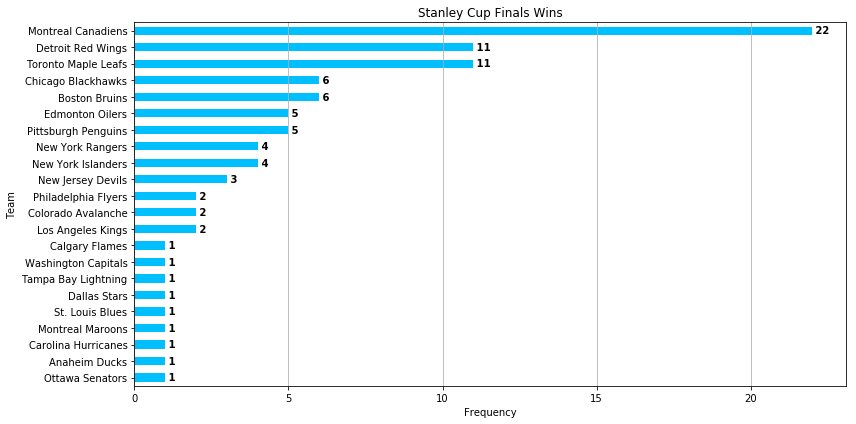

In [21]:
plt.figure(num=1,figsize=(12,6))
team_wins = data.team_win.value_counts(ascending=True).plot.barh(color='deepskyblue')
team_wins.set_xlabel('Frequency')
team_wins.set_ylabel('Team')
team_wins.set_title('Stanley Cup Finals Wins')
team_wins.grid(True,which='major',axis='x')
for i,v in enumerate(data.team_win.value_counts(ascending=True)):
    team_wins.text(v,i," "+str(v), color='black',va='center',fontweight='bold')
plt.tight_layout()
plt.show()

### Most Stanley Cup Finals Wins by Coach

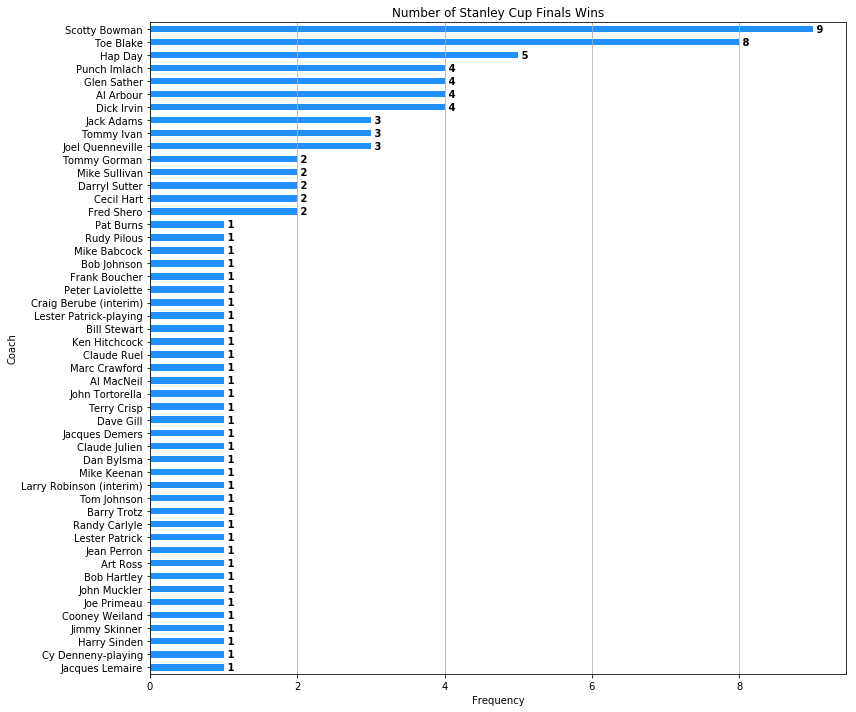

In [20]:
plt.figure(num=2,figsize=(12,10))
coach_wins = data.coach_win.value_counts(ascending=True).plot.barh(color='dodgerblue')
coach_wins.set_xlabel('Frequency')
coach_wins.set_ylabel('Coach')
coach_wins.set_title('Number of Stanley Cup Finals Wins')
coach_wins.grid(True,which='major',axis='x')
for i,v in enumerate(data.coach_win.value_counts(ascending=True)):
    coach_wins.text(v,i," "+str(v), color='black',va='center',fontweight='bold')
plt.tight_layout()
plt.show()

### Most Stanley Cup Finals Loses by Team

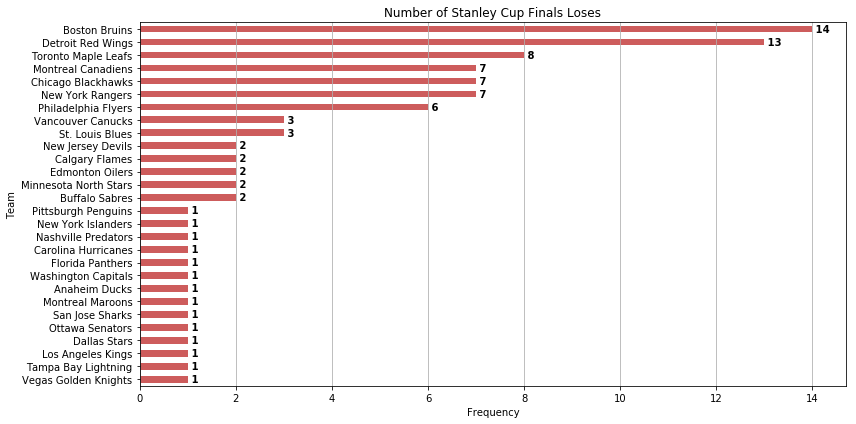

In [22]:
plt.figure(num=3, figsize=(12,6))
team_loses = data.team_lose.value_counts(ascending=True).plot.barh(color='indianred')
team_loses.set_xlabel('Frequency')
team_loses.set_ylabel('Team')
team_loses.set_title('Number of Stanley Cup Finals Loses')
team_loses.grid(True,which='major',axis='x')
for i,v in enumerate(data.team_lose.value_counts(ascending=True)):
    team_loses.text(v,i," "+str(v), color='black',va='center',fontweight='bold')
plt.tight_layout()
plt.show()

### Most Stanley Cup Finals Loses by Coach

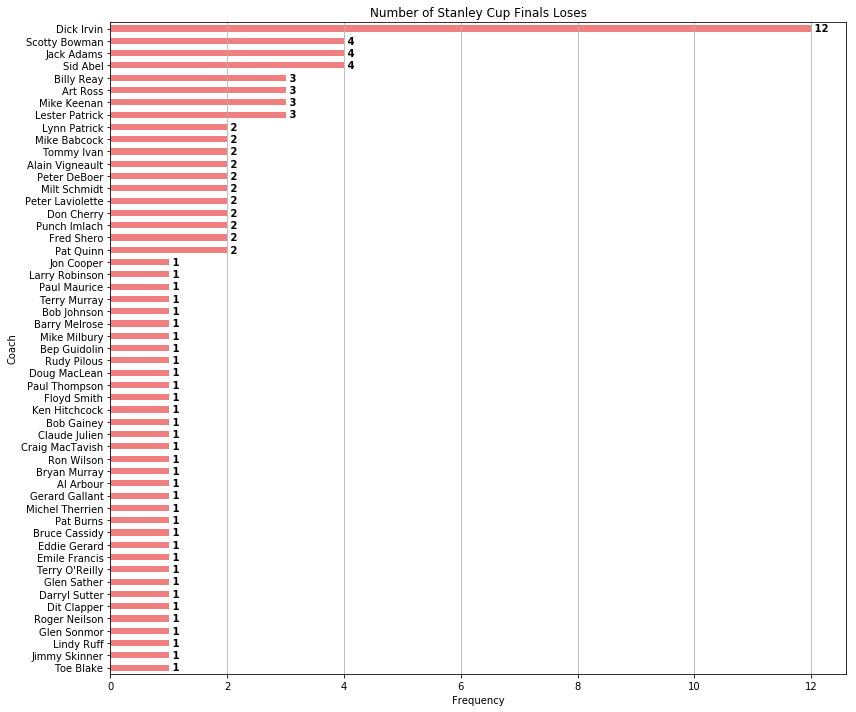

In [23]:
plt.figure(num=4,figsize=(12,10))
coach_loses = data.coach_lose.value_counts(ascending=True).plot.barh(color='lightcoral')
coach_loses.set_xlabel('Frequency')
coach_loses.set_ylabel('Coach')
coach_loses.set_title('Number of Stanley Cup Finals Loses')
coach_loses.grid(True,which='major',axis='x')
for i,v in enumerate(data.coach_lose.value_counts(ascending=True)):
    coach_loses.text(v,i," "+str(v), color='black',va='center',fontweight='bold')
plt.tight_layout()
plt.show()

### Most Finals Appearances by Team

To calculate the total number of appearances by a team (win+lose) we must first create  dictionaries of the win counts and lose counts seperatly, then combine them into a totals dictionary before we can plot.

In [28]:
#create dictionaries of team appearances in cup final (win + lose)
win_dic = Counter(data['team_win'])
lose_dic = Counter(data['team_lose'])
Total_dic = win_dic + lose_dic
#Total_dic #uncomment to view dictionary

In [27]:
#create df from above dictionary
total_cup_app = pd.DataFrame.from_dict(Total_dic, orient='index',columns=['Number of Cup Appearances'])
total_cup_app = total_cup_app.sort_values('Number of Cup Appearances',ascending=False)
total_cup_app.index.names = ['Team']
#total_cup_app #uncomment to view new df

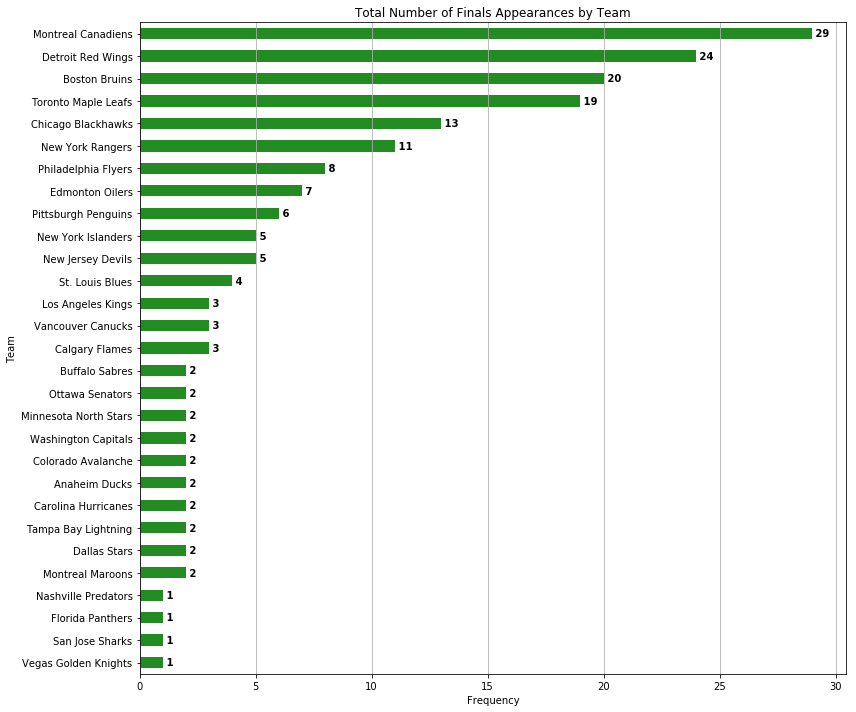

In [46]:
plt.figure(num=5,figsize=(12,10))
total_team_appearances = total_cup_app['Number of Cup Appearances'].sort_values(ascending=True).plot.barh(color='forestgreen')
total_team_appearances.set_xlabel('Frequency')
total_team_appearances.set_title('Total Number of Finals Appearances by Team')
total_team_appearances.grid(True,which='major',axis='x')
for i,v in enumerate(total_cup_app['Number of Cup Appearances'].sort_values(ascending=True)):
    total_team_appearances.text(v,i," "+str(v), color='black',va='center',fontweight='bold')
plt.tight_layout()    

### Most Finals Appearances by Coach

just like for teams above, we must create a dictionary containing counts from both win and lose columns.

In [41]:
#create dic like team but for coaches
wc_dic = Counter(data['coach_win'])
lc_dic = Counter(data['coach_lose'])
coach_total_dic = wc_dic + lc_dic
#coach_total_dic #uncomment to view dictionary

In [43]:
#create df from above dictionary
total_coach_app = pd.DataFrame.from_dict(coach_total_dic, orient='index',columns=['Number of Cup Appearances'])
total_coach_app = total_coach_app.sort_values('Number of Cup Appearances',ascending=False)
total_coach_app.index.names = ['Coach']
#total_coach_app #uncomment to view new df

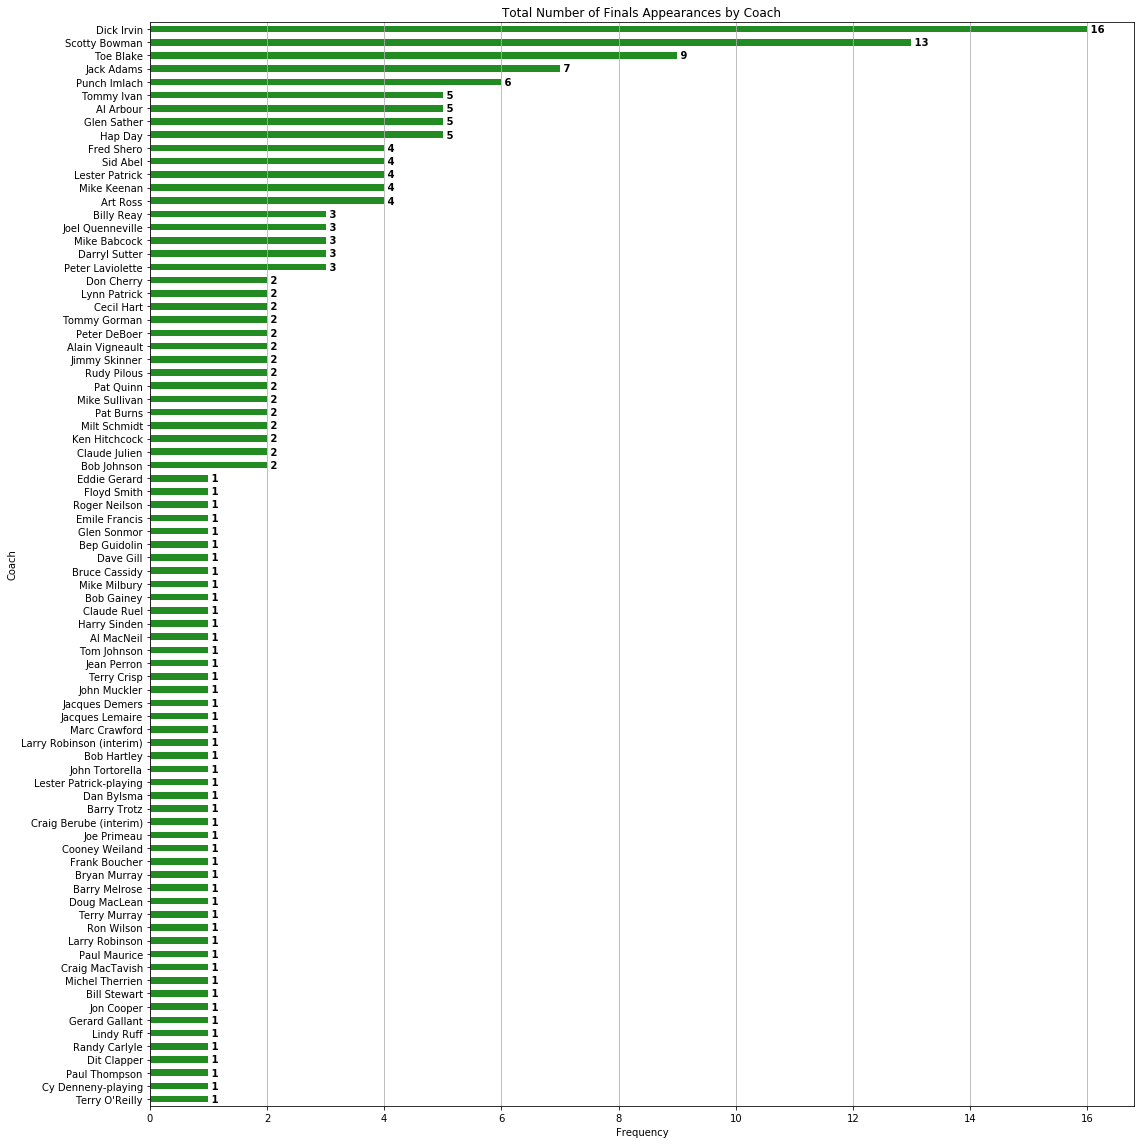

In [54]:
plt.figure(num=6,figsize=(16,16))
total_coach_appearances = total_coach_app['Number of Cup Appearances'].sort_values(ascending=True).plot.barh(color='forestgreen')
total_coach_appearances.set_xlabel('Frequency')
total_coach_appearances.set_title('Total Number of Finals Appearances by Coach')
total_coach_appearances.grid(True,which='major',axis='x')
for i,v in enumerate(total_coach_app['Number of Cup Appearances'].sort_values(ascending=True)):
    total_coach_appearances.text(v,i," "+str(v), color='black',va='center',fontweight='bold')
plt.tight_layout()


### Game Winning Goal Distibution by Period

Text(0.5, 1.0, 'Game Winning Goal by Period')

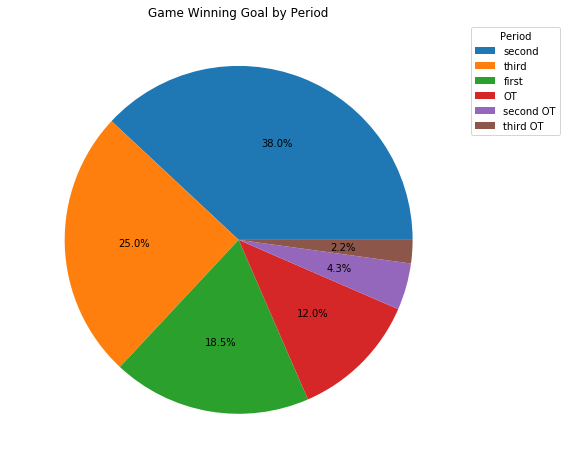

In [95]:
plt.figure(num=7,figsize=(8,8))
labels = ['second','third','first','OT','second OT','third OT']
goal_dist = data.period.value_counts().plot.pie(labels=None,autopct='%1.1f%%')
goal_dist.legend(labels,title='Period',loc='upper right',bbox_to_anchor=(0.75, 0, 0.5, 1))
goal_dist.set_ylabel(' ')
goal_dist.set_title('Game Winning Goal by Period')